In [1]:
#importing the libraries
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np


print(tf.__version__)

2024-03-31 12:15:01.336282: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 12:15:01.460746: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 12:15:01.460869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 12:15:01.464420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 12:15:01.482491: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 12:15:01.484515: I tensorflow/core/platform/cpu_feature_guard.cc:1

2.15.0


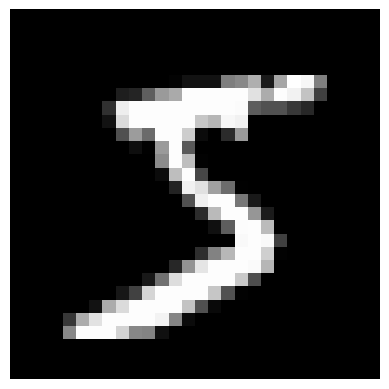

In [2]:
#loading the handwritten datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#showing the first image
plt.imshow(x_train[0], cmap='gray')
plt.axis("off")
plt.show()

In [4]:
#normalizing pixel value between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0



In [24]:
#encoder modelling

encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
encoder_output = keras.layers.Dense(32, activation='relu')(x)


encoder = keras.Model(encoder_input, encoder_output, name='encoder')

# decoder modelling
decoder_input = keras.layers.Dense(32, activation='relu')(encoder_output)
x = keras.layers.Dense(64, activation='relu')(decoder_input)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(784, activation='relu')(x)
decoder_output = keras.layers.Reshape((28,28,1))(x)


opt = keras.optimizers.Adam(lr=0.001)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()



Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 64)                

In [34]:
autoencoder.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
autoencoder.fit(x_train, x_train, epochs=6, batch_size=32, shuffle=True,validation_split=0.1)


Epoch 1/6
1688/1688 [==============================] - 44s 24ms/step - loss: 0.0153 - accuracy: 0.8137 - val_loss: 0.0152 - val_accuracy: 0.8139
Epoch 2/6
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0152 - accuracy: 0.8137 - val_loss: 0.0155 - val_accuracy: 0.8139
Epoch 3/6
1688/1688 [==============================] - 31s 18ms/step - loss: 0.0150 - accuracy: 0.8138 - val_loss: 0.0151 - val_accuracy: 0.8140
Epoch 4/6
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0149 - accuracy: 0.8138 - val_loss: 0.0148 - val_accuracy: 0.8141
Epoch 5/6
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0148 - accuracy: 0.8138 - val_loss: 0.0150 - val_accuracy: 0.8140
Epoch 6/6
1688/1688 [==============================] - 33s 19ms/step - loss: 0.0147 - accuracy: 0.8139 - val_loss: 0.0148 - val_accuracy: 0.8141


1/1 [==============================] - 0s 52ms/step


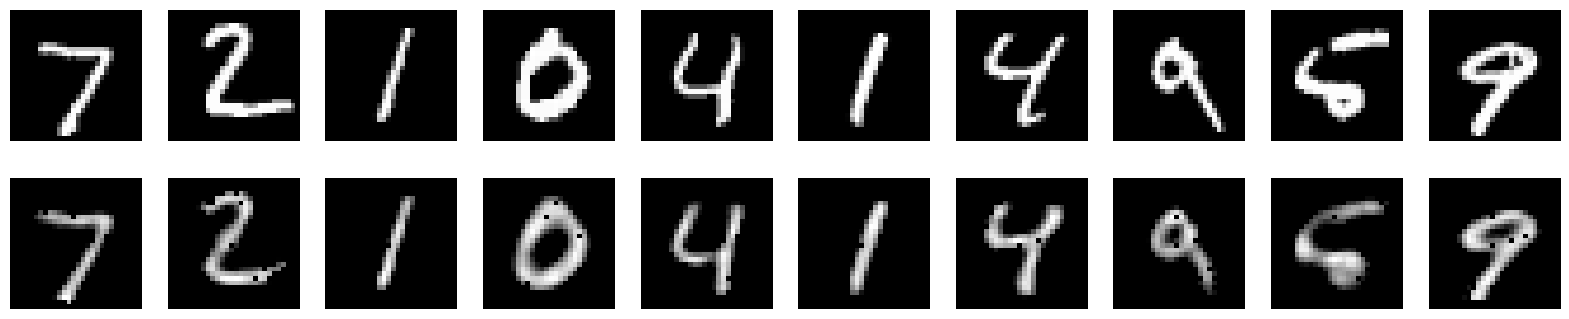

In [43]:
plt.figure(figsize=(20,4))
n = 10

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    plt.gray()
    plt.axis('off')

    ax = plt.subplot(2, n , i+1+n)
    plt.imshow(autoencoder.predict([x_test[i].reshape(-1,28,28,1)])[0])
    plt.gray()
    plt.axis('off')

plt.show()

In [45]:
(x_fashion, _), (x_fashion_test, _) = keras.datasets.fashion_mnist.load_data()



(10000, 28, 28)

In [54]:
x_fashion_test = x_fashion_test / 255.0
x_fashion = x_fashion / 255.0

In [55]:
autoencoder.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
autoencoder.fit(x_fashion ,x_fashion, epochs=3, batch_size=16, shuffle=True,validation_split=0.1)

Epoch 1/3
3375/3375 [==============================] - 68s 19ms/step - loss: 0.1991 - accuracy: 0.5021 - val_loss: 0.1842 - val_accuracy: 0.4984
Epoch 2/3
3375/3375 [==============================] - 60s 18ms/step - loss: 0.1803 - accuracy: 0.5027 - val_loss: 0.1808 - val_accuracy: 0.4988
Epoch 3/3
3375/3375 [==============================] - 72s 21ms/step - loss: 0.1782 - accuracy: 0.5030 - val_loss: 0.1793 - val_accuracy: 0.4991


In [57]:
plt.figure(figsize=(20,4))
n = 10

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_fashion_test[i])
    plt.gray()
    plt.axis('off')

    ax = plt.subplot(2, n , i+1+n)
    plt.imshow(autoencoder.predict([x_fashion_test[i].reshape(-1,28,28,1)])[0])
    plt.gray()
    plt.axis('off')

plt.show()